# Data Cleaning Step

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import pycountry
import pycountry_convert as pc
from pycountry_convert import country_name_to_country_alpha2
from pycountry_convert import country_alpha2_to_continent_code

In [3]:
## Pulling data from csvs and storing as dataframes and Cleaning our dataframes

pharm_csv = os.path.join(os.getcwd(), "Data", "pharmacists.csv")
pharm_df = pd.read_csv(pharm_csv)
##Changing column names
pharm_df = pharm_df.rename(columns = {"First Tooltip" : "Pharmicists Per 10,000"}).drop(columns =["Indicator"])



med_doctors_csv = os.path.join(os.getcwd(), "Data", "medicalDoctors.csv")
med_doctors_df = pd.read_csv(med_doctors_csv)
##Changing column names
med_doctors_df = med_doctors_df.rename(columns = {"First Tooltip" : "Medical Doctors Per 10,000"}).drop(columns =["Indicator"])



life_expect_csv = os.path.join(os.getcwd(), "Data", "Life expectancy.csv")
life_expect_df = pd.read_csv(life_expect_csv)
##Changing column names
life_expect_df = life_expect_df.rename(columns = {"Entity" : "Location",
                                                 "Year" : "Period"
                                                 })


hand_wash_csv = os.path.join(os.getcwd(), "Data", "basicHandWashing.csv")
hand_wash_df = pd.read_csv(hand_wash_csv)
##Changing column names
hand_wash_df = hand_wash_df.rename(columns = {"First Tooltip" : "Population with basic handwashing facilities at home (%)"}).drop(columns =["Indicator"])
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Urban")==False]
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Rural")==False]
hand_wash_df = hand_wash_df.drop(columns = {"Dim1"})



drink_water_csv = os.path.join(os.getcwd(), "Data", "basicDrinkingWaterServices.csv")
drink_water_df = pd.read_csv(drink_water_csv)
##Changing column names
drink_water_df = drink_water_df.rename(columns = {"First Tooltip" : "Population using at least basic drinking-water services (%)"}).drop(columns =["Indicator"])



sanitize_csv= os.path.join(os.getcwd(), "Data", "atLeastBasicSanitizationServices.csv")
sanitize_df = pd.read_csv(sanitize_csv)
##Changing column names
sanitize_df = sanitize_df.rename(columns = {"First Tooltip" : "Population using at least basic sanitization services (%)"}).drop(columns =["Indicator"])
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Urban")==False]
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Rural")==False]
sanitize_df = sanitize_df.drop(columns = {"Dim1"})



In [4]:
sanitize_df

,Location,Period,Population using at least basic sanitization services (%)
0,Afghanistan,2017,43.42
3,Afghanistan,2016,42.05
6,Afghanistan,2015,40.71
9,Afghanistan,2014,39.37
12,Afghanistan,2013,38.06
...,...,...,...
9353,Zimbabwe,2004,45.37
9356,Zimbabwe,2003,46.11
9359,Zimbabwe,2002,46.15
9362,Zimbabwe,2001,46.05


### Merge tha Data

In [5]:
merge_df1 = pd.merge(pharm_df, med_doctors_df, on = ["Location", "Period"], how = "outer")
merge_df1

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000"
0,Afghanistan,2016,0.47,2.78
1,Afghanistan,2015,0.50,2.85
2,Afghanistan,2014,0.51,2.98
3,Afghanistan,2012,0.27,2.41
4,Afghanistan,2011,0.28,2.52
...,...,...,...,...
2620,Zimbabwe,2011,NaN,0.82
2621,Zimbabwe,2008,NaN,0.60
2622,Zimbabwe,2007,NaN,0.54
2623,Zimbabwe,2005,NaN,1.26


In [6]:
merge_df2 = pd.merge(merge_df1, life_expect_df, on = ["Location", "Period"], how = "outer")
merge_df2

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy
0,Afghanistan,2016,0.47,2.78,NaN
1,Afghanistan,2015,0.50,2.85,NaN
2,Afghanistan,2014,0.51,2.98,NaN
3,Afghanistan,2012,0.27,2.41,NaN
4,Afghanistan,2011,0.28,2.52,NaN
...,...,...,...,...,...
5637,United States,2012,NaN,NaN,78.940002
5638,United States,2013,NaN,NaN,78.959999
5639,United States,2014,NaN,NaN,78.940002
5640,United States,2015,NaN,NaN,78.870003


In [7]:
merge_df3 = pd.merge(merge_df2, hand_wash_df, on = ["Location", "Period"], how = "outer")
merge_df4 = pd.merge(merge_df3, drink_water_df, on = ["Location", "Period"], how = "outer")
final_merge_df = pd.merge(merge_df4, sanitize_df, on = ["Location", "Period"], how = "outer")
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
0,Afghanistan,2016,0.47,2.78,NaN,37.67,54.84,42.05
1,Afghanistan,2015,0.50,2.85,NaN,37.59,52.39,40.71
2,Afghanistan,2014,0.51,2.98,NaN,37.52,49.96,39.37
3,Afghanistan,2012,0.27,2.41,NaN,37.37,45.19,36.75
4,Afghanistan,2011,0.28,2.52,NaN,37.30,42.84,35.46
...,...,...,...,...,...,...,...,...
7079,Zimbabwe,2003,NaN,NaN,NaN,NaN,58.59,46.11
7080,Zimbabwe,2002,NaN,NaN,NaN,NaN,59.23,46.15
7081,Zimbabwe,2001,NaN,NaN,NaN,NaN,59.88,46.05
7082,Republic of Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00


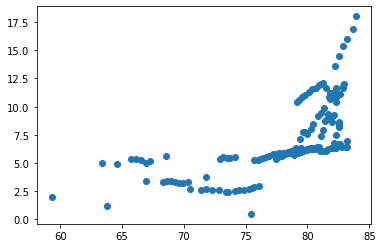

In [8]:
## Scatterplot of Life Expectancy vs Pharmicists per 10,000
plt.scatter(final_merge_df["Life expectancy"], final_merge_df["Pharmicists Per 10,000"])

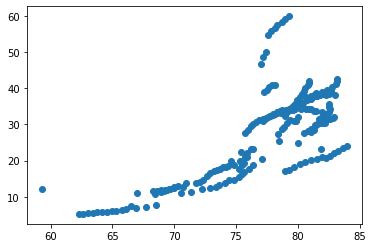

In [9]:
## Scatterplot of Life Expectancy vs Medical Doctors per 10,000
plt.scatter(final_merge_df["Life expectancy"], final_merge_df["Medical Doctors Per 10,000"])

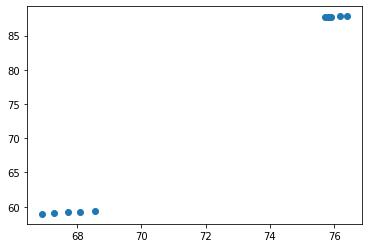

In [10]:
## Scatterplot of Life Expectancy vs Population with basic handwashing facilities at home
plt.scatter(final_merge_df["Life expectancy"], final_merge_df["Population with basic handwashing facilities at home (%)"])

In [11]:
## Count the number of data points for Population with basic handwashing facilities at home
final_merge_df["Population with basic handwashing facilities at home (%)"].count()

921

In [12]:
##Test dataframe for individual country (Canada)
can_df = final_merge_df.loc[final_merge_df["Location"] == "Canada"]
can_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
336,Canada,2016,11.24,23.11,81.849998,NaN,98.83,99.32
3021,Canada,1800,NaN,NaN,39.000000,NaN,NaN,NaN
3022,Canada,1801,NaN,NaN,39.001495,NaN,NaN,NaN
3023,Canada,1802,NaN,NaN,39.002995,NaN,NaN,NaN
3024,Canada,1803,NaN,NaN,39.004490,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3233,Canada,2012,NaN,NaN,81.660004,NaN,98.61,99.48
3234,Canada,2013,NaN,NaN,81.750000,NaN,98.66,99.44
3235,Canada,2014,NaN,NaN,81.790001,NaN,98.72,99.40
3236,Canada,2015,NaN,NaN,81.769997,NaN,98.77,99.36


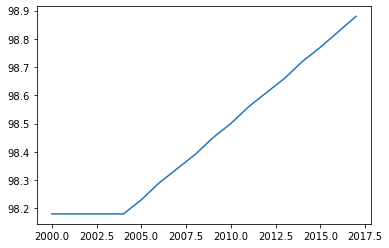

In [13]:
plt.plot(can_df["Period"], can_df["Population using at least basic drinking-water services (%)"])

In [14]:
final_merge_df["Location"].nunique()

198

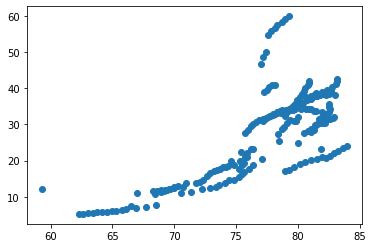

In [15]:
plt.scatter(final_merge_df["Life expectancy"], final_merge_df["Medical Doctors Per 10,000"])

In [16]:
## Clean data frame of countries with invalid location names for conversion
for index, row in final_merge_df.iterrows():
    country = row['Location']
    if country == "Bolivia (Plurinational State of)":
        change_country = "Bolivia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Côte d’Ivoire":
        change_country = "Ivory Coast"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Iran (Islamic Republic of)":
        change_country = "Iran"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Republic of Korea":
        change_country = "South Korea"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Sudan (until 2011)":
        change_country = "Sudan"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Timor-Leste":
        change_country = "East Timor"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Micronesia (Federated States of)":
        change_country = "Micronesia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "The former Yugoslav Republic of Macedonia":
        change_country = "North Macedonia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Venezuela (Bolivarian Republic of)":
        change_country = "Venezuela"
        final_merge_df.loc[ index, "Location"] = change_country

In [17]:
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
0,Afghanistan,2016,0.47,2.78,NaN,37.67,54.84,42.05
1,Afghanistan,2015,0.50,2.85,NaN,37.59,52.39,40.71
2,Afghanistan,2014,0.51,2.98,NaN,37.52,49.96,39.37
3,Afghanistan,2012,0.27,2.41,NaN,37.37,45.19,36.75
4,Afghanistan,2011,0.28,2.52,NaN,37.30,42.84,35.46
...,...,...,...,...,...,...,...,...
7079,Zimbabwe,2003,NaN,NaN,NaN,NaN,58.59,46.11
7080,Zimbabwe,2002,NaN,NaN,NaN,NaN,59.23,46.15
7081,Zimbabwe,2001,NaN,NaN,NaN,NaN,59.88,46.05
7082,South Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00


In [18]:
#Put info into Continent Row based on Location
for index, row in final_merge_df.iterrows():
    # get continent type from df
    country = row['Location']
    try:
        # print(country)
        c_to_a = country_name_to_country_alpha2(country)
        # print(c_to_a)    
        c_to_c = country_alpha2_to_continent_code(c_to_a)   
        final_merge_df.loc[index, 'Continent']= c_to_c
    except KeyError:
        print(f"Skipping {country}")

Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor
Skipping East Timor


In [19]:
country_name_to_country_alpha2("East Timor")

'TL'

In [20]:
country_alpha2_to_continent_code(country_name_to_country_alpha2("East Timor"))

KeyError: "Invalid Country Alpha-2 code: 'TL'"

In [23]:
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%),Continents
0,Afghanistan,2016,0.47,2.78,NaN,37.67,54.84,42.05,AS
1,Afghanistan,2015,0.50,2.85,NaN,37.59,52.39,40.71,AS
2,Afghanistan,2014,0.51,2.98,NaN,37.52,49.96,39.37,AS
3,Afghanistan,2012,0.27,2.41,NaN,37.37,45.19,36.75,AS
4,Afghanistan,2011,0.28,2.52,NaN,37.30,42.84,35.46,AS
...,...,...,...,...,...,...,...,...,...
7079,Zimbabwe,2003,NaN,NaN,NaN,NaN,58.59,46.11,AF
7080,Zimbabwe,2002,NaN,NaN,NaN,NaN,59.23,46.15,AF
7081,Zimbabwe,2001,NaN,NaN,NaN,NaN,59.88,46.05,AF
7082,South Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00,AS


In [25]:
final_merge_df.groupby(["Continents"]).describe()

Period                                                           \
             count         mean        std     min      25%     50%     75%   
Continents                                                                    
AF          1004.0  2008.302789   5.663544  1990.0  2004.00  2008.0  2013.0   
AS          1584.0  1966.153409  63.277376  1800.0  1931.75  2001.0  2009.0   
EU          2461.0  1945.078423  68.299585  1800.0  1887.00  1975.0  2004.0   
NA          1079.0  1947.352178  68.877376  1800.0  1889.50  1979.0  2006.0   
OC           494.0  1965.109312  64.247747  1802.0  1925.25  2002.0  2010.0   
SA           445.0  1958.921348  66.441471  1800.0  1911.00  1999.0  2009.0   

                   Pharmicists Per 10,000            ...  \
               max                  count      mean  ...   
Continents                                           ...   
AF          2018.0                  302.0  0.794166  ...   
AS          2018.0                  566.0  3.591606  ...   
EU          2018.0                  736.0  6.127568  ...   
NA          2018.0                   57.0  4.004614  ...   
OC          2018.0                   73.0  3.716014  ...   
SA          2018.0                   51.0  2.277647  ...   

           Population using at least basic drinking-water services (%)  \
                                                                   75%   
Continents                                                               
AF                                                    63.3700            
AS                                                    98.1000            
EU                                                   100.0000            
NA                                                    97.0000            
OC                                                    99.1325            
SA                                                    89.9175            

                   Population using at least basic sanitization services (%)  \
               max                                                     count   
Continents                                                                     
AF           99.83                                              959.0          
AS          100.00                                              817.0          
EU          100.00                                              743.0          
NA          100.00                                              408.0          
OC          100.00                                              286.0          
SA          100.00                                              210.0          

                                                                           
                 mean        std    min      25%     50%      75%     max  
Continents                                                                 
AF          37.448248  26.259016   3.40  16.4700  30.420  50.7850  100.00  
AS          79.967283  22.821293   9.96  64.5500  91.400  98.5200  100.00  
EU          95.806057   5.822670  74.31  95.1150  98.070  99.4500  100.00  
NA          82.005784  15.760934  16.75  77.8175  85.930  91.5800   99.97  
OC          74.315944  28.175722  12.95  54.5025  84.155  97.8575  100.00  
SA          81.096286  13.819935  34.51  75.0175  82.960  92.6500  100.00  

[6 rows x 56 columns]